In [3]:
import os
os.chdir("D:\\meridianthe4\\PML\\Datasets")
import pandas as pd
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dbda.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
dataset = pd.read_csv("Restaurant_Reviews.tsv", sep='\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
corpus = []
stops = stopwords.words('english')
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus[:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

### Count Vectorization

In [9]:
cv = CountVectorizer(max_features=800)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X, columns=cv.get_feature_names_out())
y = dataset['Liked']

In [10]:
X.head()

,absolut,account,ach,acknowledg,across,actual,ad,afford,afternoon,ago,...,yama,yay,yeah,year,yellow,yellowtail,yet,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
classifier = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.7933333333333333


### TF-IDF Vectorization

In [15]:
cv = TfidfVectorizer(max_features=800)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X, columns=cv.get_feature_names_out())
y = dataset['Liked']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)
classifier = RandomForestClassifier(n_estimators=25, random_state=25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.78


### WordCloud

In [17]:
corpus2 = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus2.append(review)
corpus2[:6]

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great prices',
 'getting angry want damn pho']

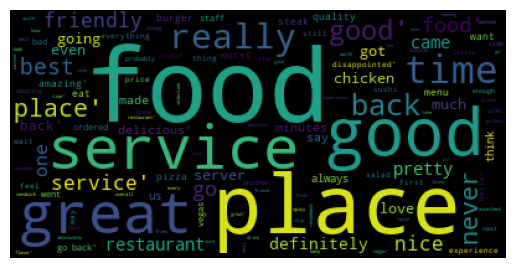

In [25]:
corp_str = str(corpus2)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()